# **Double Exponential Smoothing**

Dalam meramalkan sebuah data, Exponential Smoothing akan menaksirkan berapa nilai rata-rata data
periode yang digunakan untuk mendapatkan nilai peramalan pada periode selanjutnya (Utama et al, 2016).

Holt Double Exponential Smoothing merupakan model yang di kemukakan oleh Holt, model ini biasanya
digunakan pada data dengan trend linier yang tidak dipengaruhi oleh musim (Mansyur et al, 2015). 

Dalam melakukan pemulusan, maka digunakan parameter yang berbeda dari data aktual. Setelah dilakukan
pemulusan (smoothing) kemudian akan dilakukan estimasi trend. Model Holt menggunakan dua parameter
yaitu α dan β(Hartono, 2012). 

Rumus yang gunakan dalam Holt Double Exponential Smoothing adalah sebagai berikut:

At = αYt + (1-α)(At-1+ Tt-1)

Tt = β(At - At-1) + (1 - β)Tt-1

Untuk menghitung nilai pemulusan maka kita akan membutuhkan nilai yang pertama (A1), namun
karena nilai A1 pada t1 tidak diketahui maka nilai A1 dapat digunakan nilai data aktual yang pertama yaitu Y1.

Sehingga nilai A1 = Y1. Sedangkan untuk menghitung estimasi trend, T1 dapat diasumsikan bahwa T1 = Y2 -
Y1. 

Sedangkan untuk menghitung nilai peramalan periode yang akan datang, digunakan rumus:

![alt text](https://photos.app.goo.gl/1NYfPgpQiNRkuq6s8)

Pengamatan yang akan digunakan dalam contoh ini adalah jumlah penjualan sampo selama 3 tahun (36 bulan). Kita dapat melihat di bawah ini seperti apa rangkaian waktu kita:

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import files
upload = files.upload()

Saving data.csv to data.csv


In [41]:
#membaca file dataset csv
data=pd.read_csv("data.csv",encoding='latin1')
data.head()

,Sales of shampoo
0,266.0
1,145.9
2,183.1
3,119.3
4,180.3


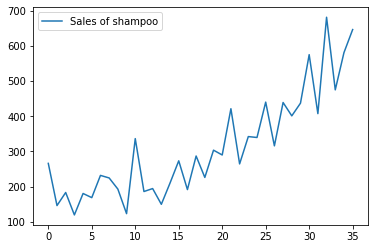

In [42]:
data.plot()
plt.show()

Bagian berikut akan mengusulkan algoritma untuk menemukan alpha dan beta terbaik. Algoritme akan mulai dari alpha = 0,1 dan beta = 01 dan akan naik ke beta = 0,9 kemudian menambahkan alpha ke alpha = 0,9. Untuk setiap alfa dan beta, algoritma akan memperkirakan pengamatan yang sudah diketahui bersama dengan MSE koresponden diikuti dengan memilih alfa dan beta dengan nilai MSE minimum.

In [62]:
optimal_alpha = None
optimal_beta = None
best_mse = None
db = data.iloc[:, :].values.astype('float32')
mean_results_for_all_possible_alpha_beta_values = np.zeros((9, 9))
for beta in range(0, 9):
    for alpha in range(0, 9):
        lt = db[0][0]
        bt = db[1][0] - db[0][0]
        mean_for_alpha_beta = np.zeros(len(db))
        mean_for_alpha_beta[0] = np.power(db[0][0] - lt, 2)
        for i in range(1, len(db)):
            temp_lt = ((alpha + 1) * 0.1) * db[i][0] + (1 - ((alpha + 1) * 0.1)) * (lt + bt)
            bt = ((beta + 1) * 0.1) * (temp_lt - lt) + (1 - ((beta + 1) * 0.1)) * bt
            lt = temp_lt
            mean_for_alpha_beta[i] = np.power(db[i][0] - lt, 2)
        mean_results_for_all_possible_alpha_beta_values[beta][alpha] = np.mean(mean_for_alpha_beta)
        optimal_beta, optimal_alpha = np.unravel_index(
            np.argmin(mean_results_for_all_possible_alpha_beta_values),
            np.shape(mean_results_for_all_possible_alpha_beta_values))
optimal_alpha = (optimal_alpha + 1) * 0.1
optimal_beta = (optimal_beta + 1) * 0.1
best_mse = np.min(mean_results_for_all_possible_alpha_beta_values)
print("Best MSE = %s" % best_mse)
print("Optimal alpha = %s" % optimal_alpha)
print("Optimal beta = %s" % optimal_beta)

Best MSE = 125.81620704283071
Optimal alpha = 0.9
Optimal beta = 0.2


Setelah "alpha" dan "beta" optimal ditemukan, kami dapat mengkalibrasi tren sebagai berikut:

In [60]:
lt = db[0][0]
bt = db[1][0] - db[0][0]
for i in range(1, len(db)):
    temp_lt = optimal_alpha * db[i][0] + (1 - optimal_alpha) * (lt + bt)
    bt = optimal_beta * (temp_lt - lt) + (1 - optimal_beta) * bt
    lt = temp_lt
print("l_t = %s" % lt)
print("b_t = %s" % bt )

l_t = 641.6334222987338
b_t = 30.033728841040205


Sekarang kita dapat memperkirakan periode selanjutnya, "m" menggunakan rumus dari bagian 3 seperti ini:

Perkiraan pada bulan ke - 37 adalah 671.7

In [58]:
print("Next observation = %s" % (lt + (1 * bt)))

Next observation = 671.667151139774


Pada bagian ini kita akan membandingkan data perkiraan dengan data nyata untuk "alpha" dan "beta" yang optimal.

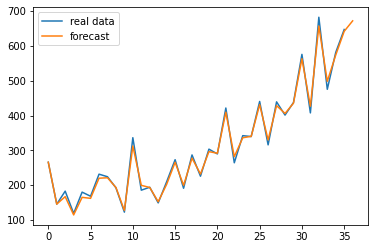

In [57]:
forecast = np.zeros(len(db) + 1)
lt = db[0][0]
bt = db[1][0] - db[0][0]
forecast[0] = lt
for i in range(1, len(db)):
    temp_lt = optimal_alpha * db[i][0] + (1 - optimal_alpha) * (lt + bt)
    bt = optimal_beta * (temp_lt - lt) + (1 - optimal_beta) * bt
    lt = temp_lt
    forecast[i] = lt
forecast[-1] = lt + (1 * bt)
plt.plot(db[:, 0],label = 'real data')
plt.plot(forecast, label = 'forecast')
plt.legend()
plt.show()

Kesimpulan :

Dalam percobaan ini ditunjukkan bagaimana algoritma Double Exponential Smoothing didasarkan pada konstanta smoothing "alpha" dan "beta". Selain itu, disajikan sebuah implementasi tentang bagaimana Anda dapat menemukan "alpha" dan "beta" yang optimal. Terbukti bahwa algoritma memberikan hasil yang sangat baik pada deret waktu yang memiliki tren. Ketika berhadapan dengan time series, banyak algoritma harus diuji untuk mencari tahu mana di antara mereka yang memberikan MSE minimum. Algoritma dengan MSE minimum harus digunakan untuk ramalan lebih lanjut tentang deret waktu tersebut.